# Zindi Mobile Money and Financial Inclusion in Tanzania challenge 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import MarkerCluster

# Examining the dataset

In [2]:
mobile_mon= pd.read_csv('training.csv')
mobile_mon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                             7094 non-null int64
Q1                             7094 non-null int64
Q2                             7094 non-null int64
Q3                             7094 non-null int64
Q4                             7094 non-null int64
Q5                             7094 non-null int64
Q6                             7094 non-null int64
Q7                             7094 non-null int64
Q8_1                           7094 non-null int64
Q8_2                           7094 non-null int64
Q8_3                           7094 non-null int64
Q8_4                           7094 non-null int64
Q8_5                           7094 non-null int64
Q8_6                           7094 non-null int64
Q8_7                           7094 non-null int64
Q8_8                           7094 non-null int64
Q8_9                           7094 non-null int64
Q8_10                     

This dataframe contains 7094 rows and 37 columns. There are 7094 ID entries meaning that it is working with 7094 people.

In [3]:
males = mobile_mon[mobile_mon.Q2 == 1]
females = mobile_mon[mobile_mon.Q2 == 2]

In [4]:
mobile_mon.rename(columns={
    'Q1':'Age', 'Q2':'Gender', 'Q3':'Marital_Status', 'Q4': 'Highest_level_of_education','Q5': 'Property_Ownership',
    'Q6': 'Land_Ownership', 'Q7': 'Mobile_Ownership', 'Q8_1':'Salaries_wages', 'Q8_2':'Trading','Q8_3':'Services',
    'Q8_4':'Casual_Work', 'Q8_5':'Rental_Income', 'Q8_6':'Interests', 'Q8_7':'Pension', 'Q8_8':'Social_Welfare',
    'Q8_9':'Financially_Dependant', 'Q8_10':'Third_Party', 'Q8_11':'Other', 'Q9':'Employer', 'Q10':'Selling_Things',
    'Q11':'Providing_Service', 'Q12':'Sent_money_past_(12 months)', 'Q13':'Money_last_sent', 
    'Q14':'Received_money_past_(12 months)', 'Q15':'Last_money_received', 'Q16':'Mobile_money_purchases',
    'Q17':'Mobile_money_bills', 'Q18':'Literacy_in_kwiswhahili', 'Q19':'Literacy_in_english'    
},inplace=True
)

# 1. Missing Values

In [5]:
missing_data = mobile_mon.isnull().sum().sum()
print('Number of missing values:',missing_data)

Number of missing values: 0


Having to examine the dataset I have found that it has no missing values

### Mapping Columns

In [6]:
assign = {3:'Widowed', 1:'Married', 4:'Single', 2:'Divorced'}
mobile_mon['Marital_Status'] = mobile_mon['Marital_Status'].map(assign)

assign_1 = {2:'Female', 1:'Male'}
mobile_mon['Gender'] = mobile_mon['Gender'].map(assign_1)

assign_2 = {0:'None', 3:'Other_Only', 2:"MM_Only", 1:'MM_Plus'}
mobile_mon['mobile_money_classification'] = mobile_mon['mobile_money_classification'].map(assign_2)

assign_3 = {2:'No', 1:'Yes'}
mobile_mon['Land_Ownership'] = mobile_mon['Land_Ownership'].map(assign_3)

assign_4 = {0:'No', 1:'Yes'}
mobile_mon['Salaries_wages'] = mobile_mon['Salaries_wages'].map(assign_4)

assign_5 = {0:'No', 1:'Yes'}
mobile_mon['Trading'] = mobile_mon['Trading'].map(assign_5)

assign_6 = {0:'No', 1:'Yes'}
mobile_mon['Services'] = mobile_mon['Services'].map(assign_6)

assign_7 = {0:'No', 1:'Yes'}
mobile_mon['Casual_Work'] = mobile_mon['Casual_Work'].map(assign_7)

assign_8 = {0:'No', 1:'Yes'}
mobile_mon['Rental_Income'] = mobile_mon['Rental_Income'].map(assign_8)

assign_9 = {0:'No', 1:'Yes'}
mobile_mon['Interests'] = mobile_mon['Interests'].map(assign_9)

assign_10 = {0:'No', 1:'Yes'}
mobile_mon['Pension'] = mobile_mon['Pension'].map(assign_10)

assign_11 = {1:'Yes', 0:'No'}
mobile_mon['Social_Welfare'] = mobile_mon['Social_Welfare'].map(assign_11)

assign_12 = {1:'Yes', 0:'No'}
mobile_mon['Financially_Dependant'] = mobile_mon['Financially_Dependant'].map(assign_12)

assign_13 = {0:'No', 1:'Yes'}
mobile_mon['Third_Party'] = mobile_mon['Third_Party'].map(assign_13)

assign_14 = {0:'No', 1:'Yes'}
mobile_mon['Other'] = mobile_mon['Other'].map(assign_14)

assign_15 = {0:'No', 1:'Yes'}
mobile_mon['mobile_money'] = mobile_mon['mobile_money'].map(assign_15)

assign_16 = {1:'Yes', 2:'No'}
mobile_mon['Sent_money_past_(12 months)'] = mobile_mon['Sent_money_past_(12 months)'].map(assign_16)

assign_17 = {-1:'N/A', 4:'90 days', 2:'7 days', 5:'less than 6months', 3:'30 days', 6:'more than 6months', 1:'Yesterday/today'}
mobile_mon['Money_last_sent'] = mobile_mon['Money_last_sent'].map(assign_17)

assign_18 = {1:'Yes', 2:'No'}
mobile_mon['Received_money_past_(12 months)'] = mobile_mon['Received_money_past_(12 months)'].map(assign_18)

assign_19 = {-1:'N/A', 1:'Never', 2:'Daily', 3:'Weekly', 4:'Monthly', 5:'less often than monthly'}
mobile_mon['Last_money_received'] = mobile_mon['Last_money_received'].map(assign_19)

assign_20 = {-1:'N/A', 1:'Never', 2:'Daily', 3:'Weekly', 4:'Monthly', 5:'less often than monthly'}
mobile_mon['Mobile_money_purchases'] = mobile_mon['Mobile_money_purchases'].map(assign_20)

assign_21 = {-1:'N/A', 1:'Never', 2:'Daily', 3:'Weekly', 4:'Monthly', 5:'less often than monthly'}
mobile_mon['Mobile_money_bills'] = mobile_mon['Mobile_money_bills'].map(assign_21)


In [7]:
rem = mobile_mon.loc[:, 'Salaries_wages':'Other']
rem['mobile_money'] = mobile_mon['mobile_money']
rem = pd.melt(rem, id_vars = ['mobile_money'], var_name='Remuneration') 
rem = rem[rem['value'] == "Yes"]
rem.Remuneration.value_counts()
#rem.head()

Trading                  4470
Casual_Work              2393
Financially_Dependant    1112
Salaries_wages            441
Services                  412
Third_Party               410
Social_Welfare            131
Rental_Income              67
Pension                    34
Interests                  34
Other                       9
Name: Remuneration, dtype: int64

Looking at the above dataframe you can separately see a breakdown of how many people who recieved different types of incomes.  

# 2. Descriptive Statistics

In [8]:
mobile_mon.describe()

,ID,Age,Highest_level_of_education,Property_Ownership,Mobile_Ownership,Employer,Selling_Things,Providing_Service,Literacy_in_kwiswhahili,Literacy_in_english,Latitude,Longitude,savings,borrowing,insurance
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,3.060051,2.548915,1.397942,-0.794615,0.876092,-0.692134,1.860164,3.163378,-6.034378,35.354029,0.461517,0.432901,0.151255
std,2731.120086,16.332148,1.557779,1.534257,0.489508,0.895007,2.172787,1.411600,1.351372,1.317691,2.720888,2.899511,0.498552,0.495512,0.358322
min,1.000000,16.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,2.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000
50%,4744.500000,35.000000,3.000000,3.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,4.000000,-6.087854,35.073326,0.000000,0.000000,0.000000
75%,7105.000000,48.000000,3.000000,4.000000,2.000000,-1.000000,1.000000,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,0.000000
max,9459.000000,100.000000,8.000000,6.000000,2.000000,7.000000,10.000000,12.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000


The tabele above shows the mean, standard deviation, minimum, maximum and interquartile ranges for each column.

# 3. Visually presenting the data

### Mobile money classification vs Age

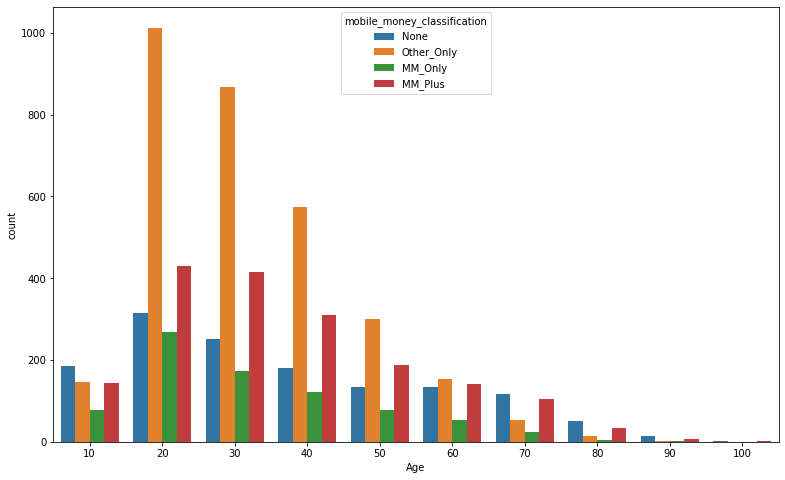

In [9]:
mobile_mon['Age'] = mobile_mon.Age.apply(lambda x : int(x/10) * 10)
plt.figure(figsize = (13,8))
sns.countplot(x = 'Age', hue = 'mobile_money_classification', data = mobile_mon)

Judging from what we see in the graph is that from the age group of 20 - 30 mostly use mobile money and at least one other financial service. Most probably the reason for that could be that they have access to mobile devices and still literate with technological devices..

### Mobile money classification vs Gender

In [10]:
fwm = round(len(females[females.mobile_money_classification > 0]) / len(mobile_mon) * 100,1)
print(fwm)
fwo= round(len(females[females.mobile_money_classification < 1]) / len(mobile_mon) * 100,1)
print(fwo)
mwm = round(len(males[males.mobile_money_classification > 0]) / len(mobile_mon) * 100,1)
print(mwm)
mwo= round(len(males[males.mobile_money_classification < 1]) / len(mobile_mon) * 100,1)
print(mwo)

43.1
12.9
37.4
6.6


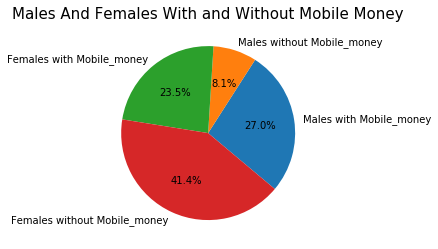

Text(0.5, 1, 'Mobile money classification vs Marital Status')

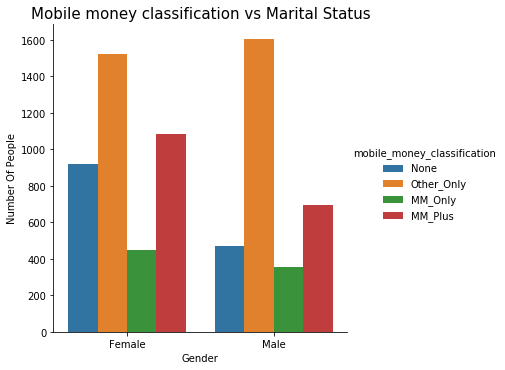

In [11]:
ratios = [.431, .129, .374, .66]
labels=['Males with Mobile_money', 'Males without Mobile_money', 'Females with Mobile_money', 'Females without Mobile_money']
plt.pie(ratios,explode=None, labels=labels, autopct='%1.1f%%', startangle=320)
plt.title('Males And Females With and Without Mobile Money', fontsize=15)
plt.show()

sns.catplot(x='Gender', kind= 'count', hue='mobile_money_classification', data=mobile_mon)
plt.xlabel('Gender')
plt.ylabel('Number Of People')
plt.title('Mobile money classification vs Marital Status', fontsize=15)


Looking at the illustration of the graphs we can clearly see that 27% of males dominantly use mobile money more than females, while only 23.5% females use mobile money.

### Mobile money classification vs Marital Status

Text(0.5, 1, 'Mobile money classification vs Marital Status')

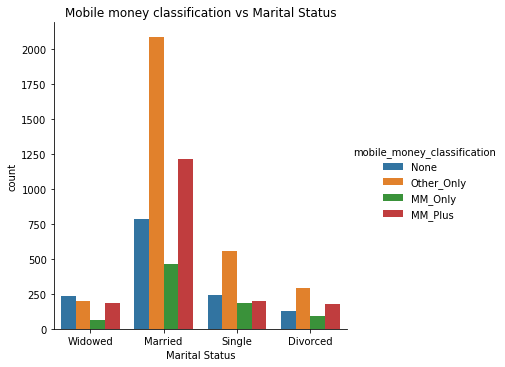

In [12]:
sns.catplot(x='Marital_Status',kind='count', hue='mobile_money_classification', data=mobile_mon).set(xlabel='Marital Status')
plt.title('Mobile money classification vs Marital Status')

Mobile money and at least one other finacial service is mostly used by married people.

### Mobile money classification vs Land Ownership

Text(24.84213541666667, 0.5, 'Number Of People')

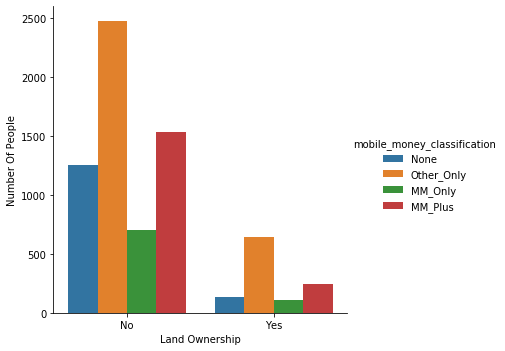

In [14]:
sns.catplot(x='Land_Ownership', kind= 'count', hue='mobile_money_classification', data=mobile_mon)
plt.xlabel('Land Ownership')
plt.ylabel('Number Of People')

Most people who do not own land use mobile money and at least one of the financial services more than the ones who own land.

### Mobile money classification vs Types of income

Text(0, 0.5, 'Income Type')

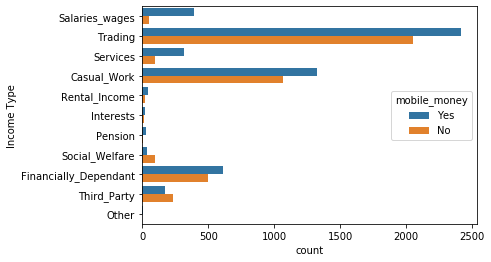

In [15]:
sns.countplot(y='Remuneration', hue= 'mobile_money', data= rem)
plt.ylabel('Income Type')

# 4. Mobile services used in Age, Gender, Marital Status, Land Ownership

Text(0.5, 1.0, 'How often people with land ownership use mobile money for purchases')

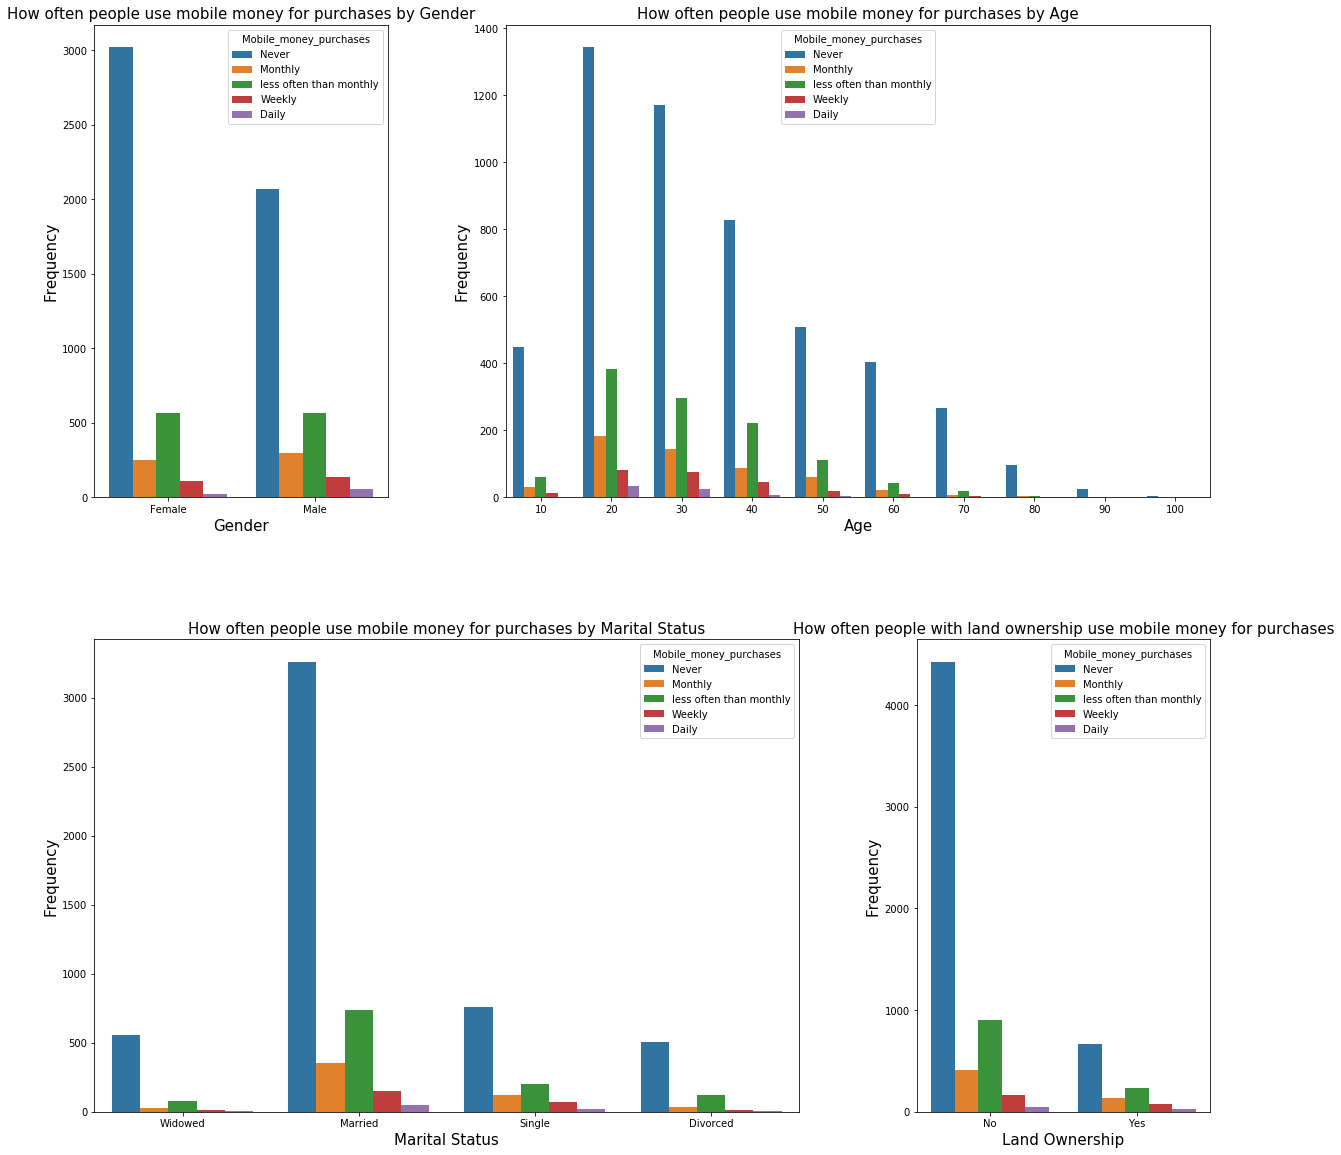

In [16]:
f, axes = plt.subplots(1, 2,figsize=(20, 20))
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
sns.countplot(x='Gender', hue='Mobile_money_purchases', data=mobile_mon)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('How often people use mobile money for purchases by Gender', fontsize=15)

plt.subplot(grid[0, 1:])
mobile_mon['Age'] = mobile_mon.Age.apply(lambda x : int(x/10) * 10)
sns.countplot(x ='Age', hue='Mobile_money_purchases', data = mobile_mon)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('How often people use mobile money for purchases by Age', fontsize=15)

plt.subplot(grid[1, :2])
sns.countplot(x='Marital_Status', hue='Mobile_money_purchases', data=mobile_mon)
plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('How often people use mobile money for purchases by Marital Status', fontsize=15)

plt.subplot(grid[1, 2])
sns.countplot(x='Land_Ownership', hue='Mobile_money_purchases', data=mobile_mon)
plt.xlabel('Land Ownership', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('How often people with land ownership use mobile money for purchases', fontsize=15)

## 5. Geographic Map

In [17]:
mobile_mon = mobile_mon[(mobile_mon["mobile_money"] == 1) & (mobile_mon['Salaries_wages'] == 1) | (mobile_mon['Trading'] == 1)  | 
                        (mobile_mon['Services'] == 1) |(mobile_mon['Casual_Work'] == 1)  |(mobile_mon['Rental_Income'] == 1) |
                        (mobile_mon['Interests'] == 1) |(mobile_mon['Pension'] == 1)|(mobile_mon['Social_Welfare'] == 1)|(mobile_mon['Financially_Dependant'] == 1)|
                        (mobile_mon['Third_Party'] == 1)|(mobile_mon['Other'] == 1)]
trading_map = folium.Map(location=[-6.161184, 35.745426], zoom_start=6)
marker_cluster = MarkerCluster().add_to(trading_map)
for lat, long in zip(mobile_mon.Latitude, mobile_mon.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)

trading_map